In [1]:
import pandas as pd
data=pd.read_csv("heart_attack_prediction_dataset.csv")

In [2]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
# Encode 'sex' column: male=0, female=1
data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})
data['Sex'].head()

0    0
1    0
2    1
3    0
4    0
Name: Sex, dtype: int64

In [42]:
data=pd.DataFrame(data.iloc[:, 1:-1])
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Risk,Systolic_BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,0,6,0,158
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,1,7,0,165
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,4,0,174
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,3,4,0,163
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,1,5,0,91


In [14]:
# Rename columns using a dictionary: {'old_name': 'new_name', ...}
data.rename(columns={'Heart Attack Risk': 'Risk'},inplace=True)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Available columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Risk']


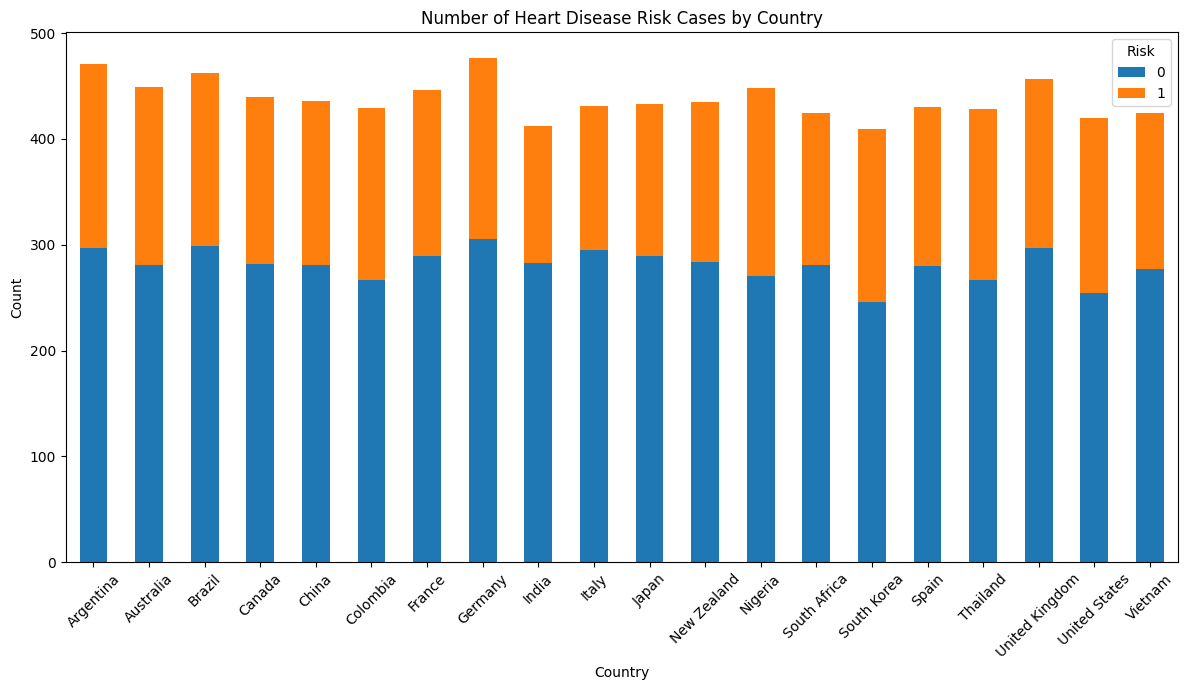

In [15]:
# Bar plot: Number of heart disease risk cases per country
import matplotlib.pyplot as plt

# Check column names to ensure correct usage
print("Available columns:", data.columns.tolist())

# If the column is not 'Risk', try using the correct column name
# For example, if the column is 'Heart Attack Risk', use that instead
# Uncomment and adjust the following lines if needed:
# data['Heart Attack Risk'] = data['Heart Attack Risk'].astype(str)
# country_risk_counts = data.groupby(['Country', 'Heart Attack Risk']).size().unstack(fill_value=0)

# If 'Risk' column exists, use the original code
if 'Risk' in data.columns:
    data['Risk'] = data['Risk'].astype(str)
    country_risk_counts = data.groupby(['Country', 'Risk']).size().unstack(fill_value=0)
    country_risk_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Number of Heart Disease Risk Cases by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Risk')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Risk' not found. Please check the column names above and use the correct one.")

Available columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Risk']


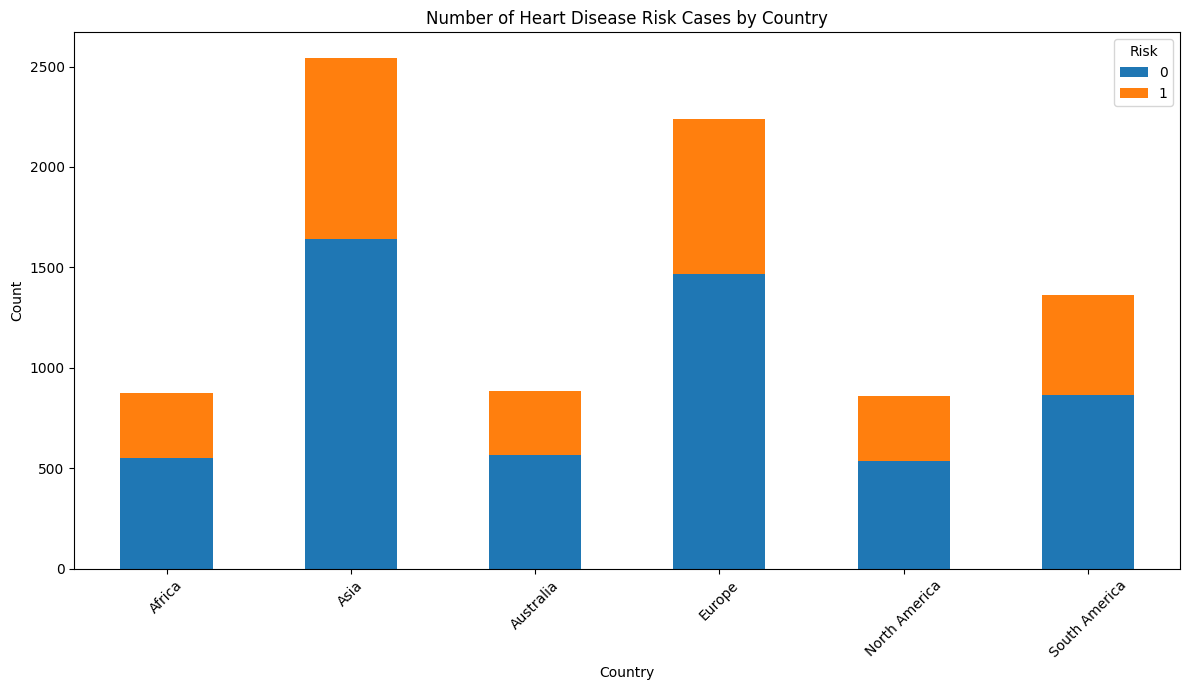

In [16]:
# Bar plot: Number of heart disease risk cases per country
import matplotlib.pyplot as plt

# Check column names to ensure correct usage
print("Available columns:", data.columns.tolist())

# If the column is not 'Risk', try using the correct column name
# For example, if the column is 'Heart Attack Risk', use that instead
# Uncomment and adjust the following lines if needed:
# data['Heart Attack Risk'] = data['Heart Attack Risk'].astype(str)
# country_risk_counts = data.groupby(['Country', 'Heart Attack Risk']).size().unstack(fill_value=0)

# If 'Risk' column exists, use the original code
if 'Risk' in data.columns:
    data['Risk'] = data['Risk'].astype(str)
    country_risk_counts = data.groupby(['Continent', 'Risk']).size().unstack(fill_value=0)
    country_risk_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Number of Heart Disease Risk Cases by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Risk')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Risk' not found. Please check the column names above and use the correct one.")

Available columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Risk']


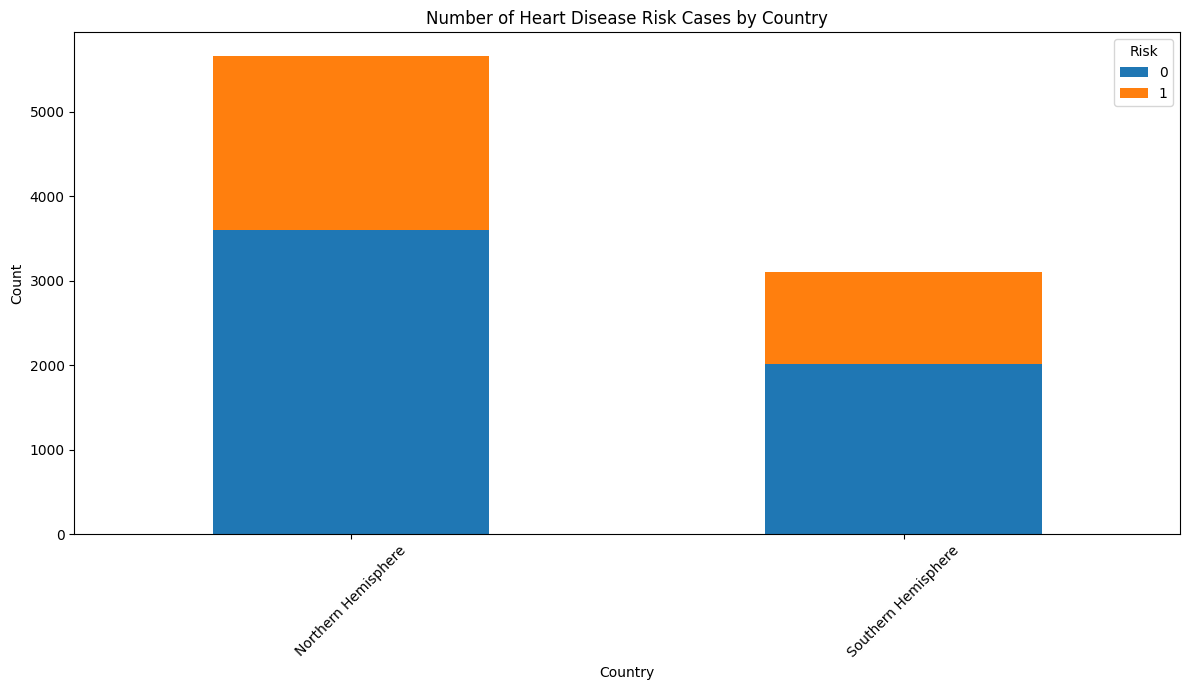

In [17]:
# Bar plot: Number of heart disease risk cases per country
import matplotlib.pyplot as plt

# Check column names to ensure correct usage
print("Available columns:", data.columns.tolist())

# If the column is not 'Risk', try using the correct column name
# For example, if the column is 'Heart Attack Risk', use that instead
# Uncomment and adjust the following lines if needed:
# data['Heart Attack Risk'] = data['Heart Attack Risk'].astype(str)
# country_risk_counts = data.groupby(['Country', 'Heart Attack Risk']).size().unstack(fill_value=0)

# If 'Risk' column exists, use the original code
if 'Risk' in data.columns:
    data['Risk'] = data['Risk'].astype(str)
    country_risk_counts = data.groupby(['Hemisphere', 'Risk']).size().unstack(fill_value=0)
    country_risk_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Number of Heart Disease Risk Cases by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Risk')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Risk' not found. Please check the column names above and use the correct one.")

In [ ]:
# Delete columns by name
data = data.drop(['Hemisphere', 'Country'], axis=1)
data.head()

In [20]:
# Delete columns by name
data = data.drop(["Continent"], axis=1)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [ ]:
# Calculate and display the correlation matrix for only numeric columns
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
Age,1.000000,-0.020067,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185
Sex,-0.020067,1.000000,-0.007614,0.010921,-0.003582,-0.002180,-0.514837,-0.002376,-0.002085,0.006976,-0.001964,0.007148,0.021835,-0.002995,-0.002660,0.003021,-0.002933,0.007660,0.005329
Cholesterol,-0.009107,-0.007614,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456
Heart Rate,-0.003844,0.010921,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811
Diabetes,-0.014105,-0.003582,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457
Family History,0.008353,-0.002180,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199
Smoking,0.394891,-0.514837,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424
Obesity,-0.008140,-0.002376,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314
Alcohol Consumption,-0.006666,-0.002085,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843
Exercise Hours Per Week,0.001206,0.006976,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245


In [12]:
print(data.shape)

(8763, 26)


C:\Users\Darsh\AppData\Local\Temp\ipykernel_9656\1387900958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Risk",data=data,palette=['red','black'])


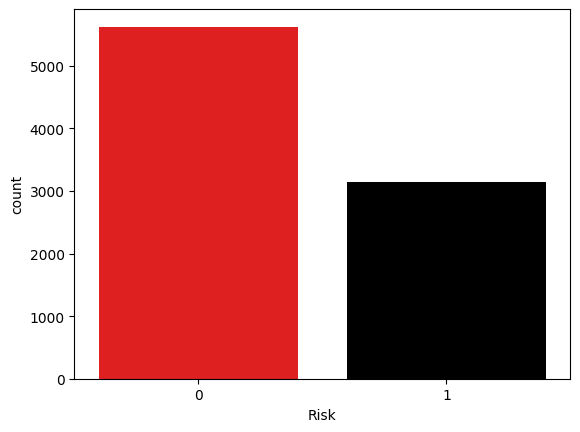

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Risk",data=data,palette=['red','black'])
plt.show()

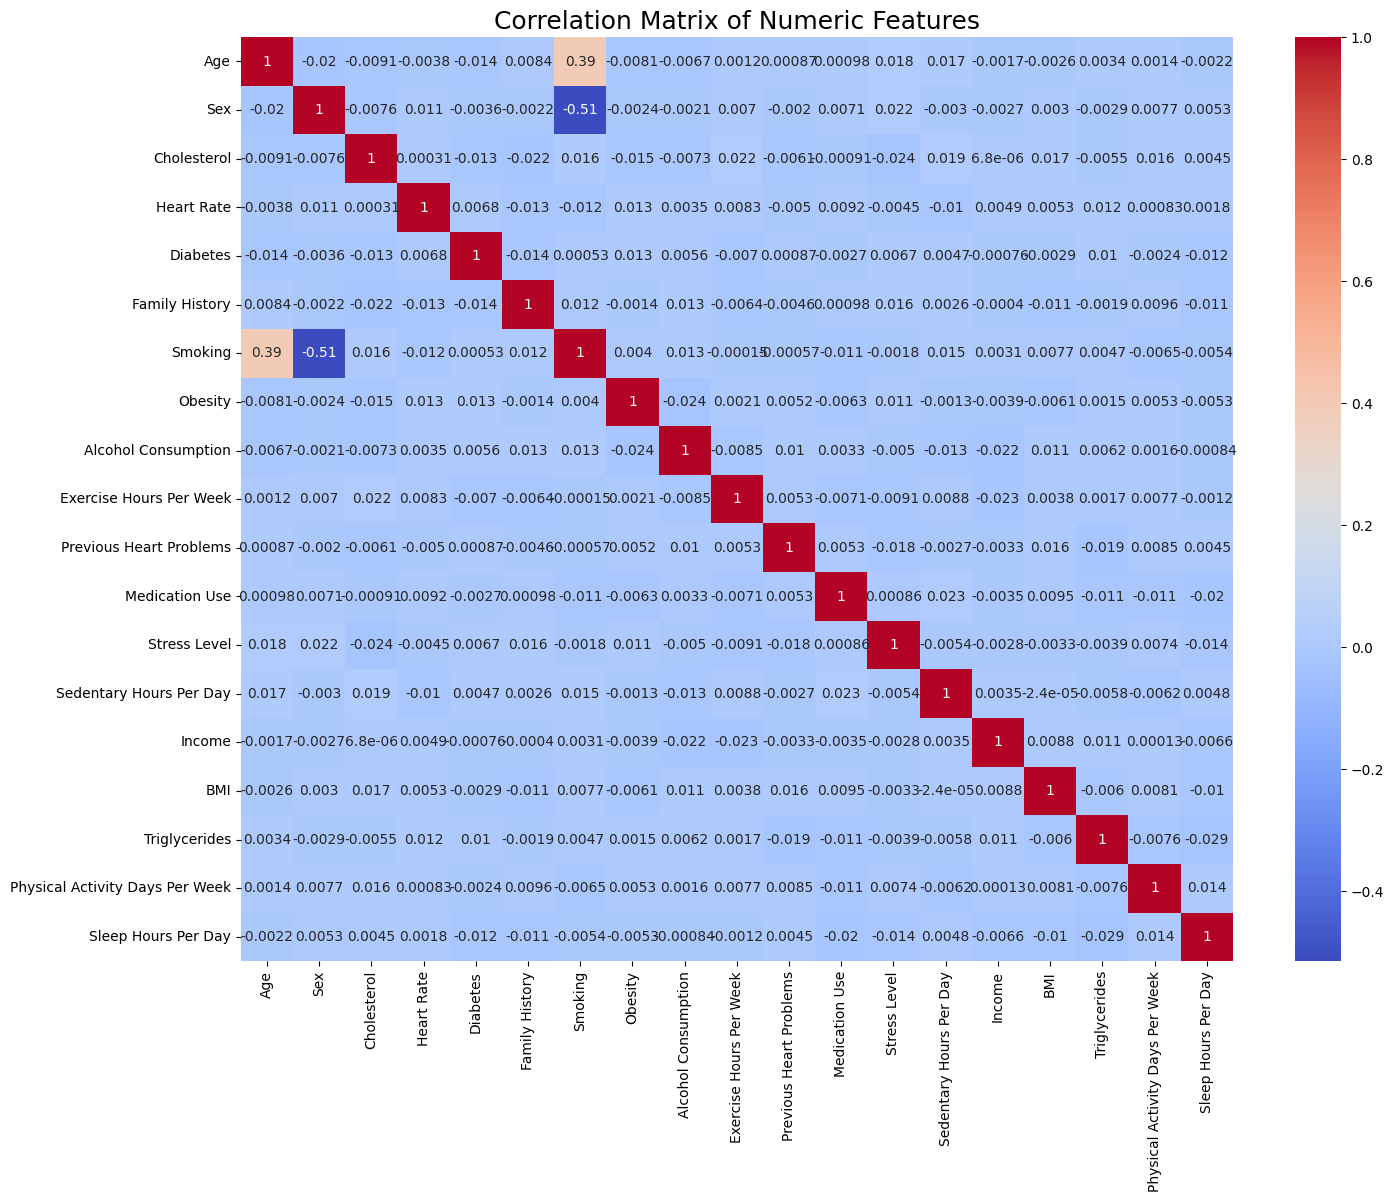

In [ ]:
numeric_data = data.select_dtypes(include='number')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))  # Increase the figure size for better readability
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features', fontsize=18)
plt.show()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [57]:
# Remove any rows where 'Average' or other non-numeric values appear in any column
data_clean = data[~data.apply(lambda row: row.astype(str).str.contains('Average')).any(axis=1)].copy()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
if 'Diet' in data_clean.columns:
    le_diet = LabelEncoder()
    data_clean['Diet'] = le_diet.fit_transform(data_clean['Diet'])
if 'Risk' in data_clean.columns:
    le_risk = LabelEncoder()
    data_clean['Risk'] = le_risk.fit_transform(data_clean['Risk'])
if 'Patient ID' in data_clean.columns:
    data_clean = data_clean.drop('Patient ID', axis=1)

# Use only numeric columns for features
X = data_clean.select_dtypes(include=['int64', 'float64'])
y = data_clean['Risk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\Darsh\OneDrive\Desktop\data science\logistic regression\logistic\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [58]:
X_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Risk,Systolic_BP
4877,24,1,206,45,1,1,0,0,1,9.196356,...,0,9,11.824261,224434,26.878671,579,6,5,0,121
8546,25,1,332,69,1,0,0,0,0,11.019976,...,0,10,11.741350,169684,29.823065,264,1,8,0,140
6925,67,1,347,108,0,0,1,0,1,13.475122,...,1,6,10.984366,283127,33.266277,350,2,10,0,142
175,23,0,380,76,0,1,1,1,0,9.199800,...,0,4,8.641793,116037,32.066442,695,5,9,0,154
7433,71,0,297,105,0,0,1,1,0,10.725028,...,1,4,10.096227,124990,35.334160,657,7,8,0,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,34,0,274,43,0,1,1,0,0,10.419022,...,0,9,9.695218,291011,26.692681,345,1,6,1,171
7745,28,0,144,71,1,1,1,1,0,15.903255,...,1,2,9.214092,207147,27.912074,351,7,8,0,165
7808,57,1,279,47,0,1,1,0,1,18.584003,...,1,2,2.431199,280349,29.899313,550,1,9,1,135
8047,77,0,276,79,1,0,1,1,1,12.894444,...,0,4,7.085050,261366,21.424427,32,1,8,0,102


In [59]:
y_pred=model.predict(X_test)

In [60]:
len(y_pred)

1171

In [61]:
print("accuracy score:",model.score(X_test,y_test))

accuracy score: 0.8505550811272417


In [62]:
print("accuracy score:", model.score(X_test, y_test))

accuracy score: 0.8505550811272417


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_train, model.predict(X_train))
print(confusion_matrix)

[[2737  254]
 [ 466 1223]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2991
           1       0.83      0.72      0.77      1689

    accuracy                           0.85      4680
   macro avg       0.84      0.82      0.83      4680
weighted avg       0.84      0.85      0.84      4680



In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[685  62]
 [113 311]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       747
           1       0.83      0.73      0.78       424

    accuracy                           0.85      1171
   macro avg       0.85      0.83      0.83      1171
weighted avg       0.85      0.85      0.85      1171



In [68]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], shape=(1171,))